<a href="https://colab.research.google.com/github/OzUygur/Data-Science-Project-House-Price-Prediction/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

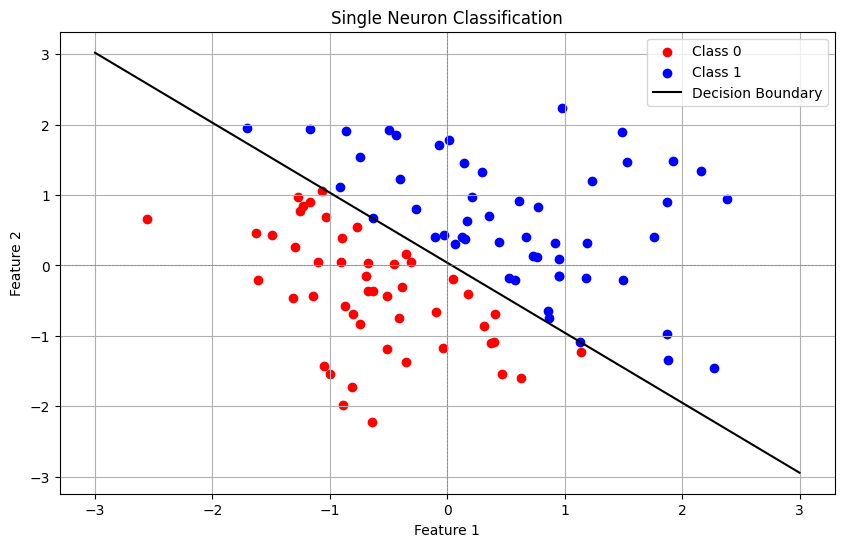

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(0)
X = np.random.randn(100, 2)
Y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Class 1 if sum of features > 0, else class 0

# Add bias term (1) to the input data
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize weights
weights = np.random.rand(3)

# Activation function (step function)
def activation(z):
    return 1 if z > 0 else 0

# Training function for perceptron
def train(X, Y, weights, epochs=10, lr=0.1):
    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], weights)
            prediction = activation(z)
            error = Y[i] - prediction
            weights += lr * error * X[i]
    return weights

# Train the model
weights = train(X_bias, Y, weights, epochs=100, lr=0.1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')

# Decision boundary
x_values = np.linspace(-3, 3, 100)
y_values = -(weights[1] * x_values + weights[0]) / weights[2]
plt.plot(x_values, y_values, color='black', label='Decision Boundary')

plt.title('Single Neuron Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


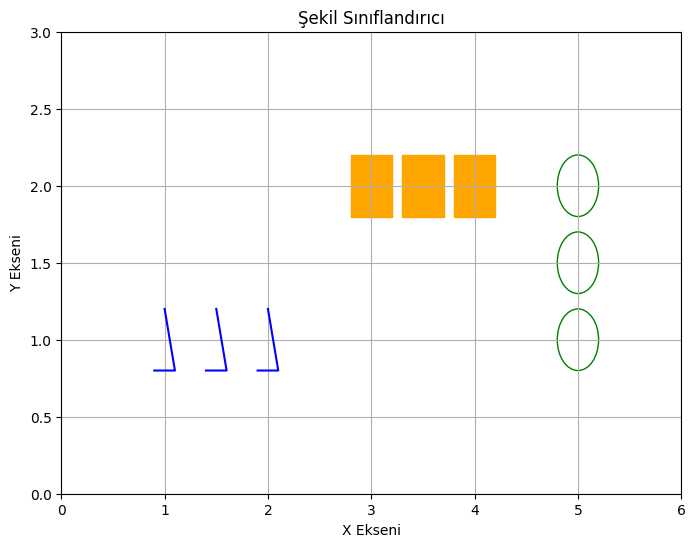

Bu şekil bir Üçgen!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Şekil verileri: (x, y, tür)
# tür: 0 = Üçgen, 1 = Kare, 2 = Çember
shapes = [
    (1, 1, 0),  # Üçgen
    (2, 1, 0),  # Üçgen
    (1.5, 1, 0),  # Üçgen
    (3, 2, 1),  # Kare
    (4, 2, 1),  # Kare
    (3.5, 2, 1),  # Kare
    (5, 1, 2),  # Çember
    (5, 2, 2),  # Çember
    (5, 1.5, 2)   # Çember
]

# Görselleştirme
plt.figure(figsize=(8, 6))

for (x, y, shape_type) in shapes:
    if shape_type == 0:  # Üçgen
        plt.plot([x-0.1, x+0.1, x], [y-0.2, y-0.2, y+0.2], color='blue')
    elif shape_type == 1:  # Kare
        plt.gca().add_patch(plt.Rectangle((x-0.2, y-0.2), 0.4, 0.4, color='orange'))
    elif shape_type == 2:  # Çember
        circle = plt.Circle((x, y), 0.2, color='green', fill=False)
        plt.gca().add_artist(circle)

plt.xlim(0, 6)
plt.ylim(0, 3)
plt.title('Şekil Sınıflandırıcı')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.grid()
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.show()

# Yeni bir şekil sınıflandır
new_shape = (2.5, 1, 0)  # 2.5, 1 konumunda bir üçgen
print(f"Bu şekil bir {'Üçgen' if new_shape[2] == 0 else 'Kare' if new_shape[2] == 1 else 'Çember'}!")


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Geliştirilmiş örnek veri seti
data = [
    ("Bu film harikaydı!", "olumlu"),
    ("Harika bir deneyim!", "olumlu"),
    ("Kesinlikle tavsiye ederim.", "olumlu"),
    ("Muhteşem bir yapım!", "olumlu"),
    ("Çok beğendim!", "olumlu"),
    ("Görsel efektler harika!", "olumlu"),
    ("Kötü bir filmdi.", "olumsuz"),
    ("Zaman kaybı.", "olumsuz"),
    ("Beklentilerimi karşılamadı.", "olumsuz"),
    ("Hayal kırıklığına uğradım.", "olumsuz"),
    ("Berbat bir deneyimdi.", "olumsuz"),
    ("Hiç hoşuma gitmedi.", "olumsuz"),
    ("İyi bir film değil.", "olumsuz"),
    ("Tam bir hayal kırıklığı.", "olumsuz"),
    ("Bu film çok güzeldi!", "olumlu"),
    ("Bence mükemmeldi!", "olumlu"),
    ("Tekrar izlemek istiyorum.", "olumlu"),
    ("Güzel bir hikaye.", "olumlu"),
    ("Sıkıcıydı.", "olumsuz"),
]

# Verileri hazırlama
texts, labels = zip(*data)

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Modeli oluşturma
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Modeli eğitme
model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
predicted_labels = model.predict(X_test)

# Sonuçları gösterme
for text, predicted in zip(X_test, predicted_labels):
    print(f"Metin: \"{text}\" - Tahmin: {predicted}")


Metin: "Bu film harikaydı!" - Tahmin: olumlu
Metin: "Görsel efektler harika!" - Tahmin: olumsuz
Metin: "Hiç hoşuma gitmedi." - Tahmin: olumsuz
Metin: "Harika bir deneyim!" - Tahmin: olumsuz


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Genişletilmiş örnek veri seti
data = [
    ("Bu film harikaydı!", "olumlu"),
    ("Harika bir deneyim!", "olumlu"),
    ("Kesinlikle tavsiye ederim.", "olumlu"),
    ("Muhteşem bir yapım!", "olumlu"),
    ("Çok beğendim!", "olumlu"),
    ("Görsel efektler harika!", "olumlu"),
    ("Bu film beni çok etkiledi.", "olumlu"),
    ("Harika karakterler!", "olumlu"),
    ("Kesinlikle izlenmesi gereken bir film.", "olumlu"),
    ("Güzel bir hikaye.", "olumlu"),
    ("Beni derinden etkiledi.", "olumlu"),
    ("İnanılmaz bir film!", "olumlu"),
    ("Bu film çok eğlenceliydi.", "olumlu"),
    ("Mükemmel bir senaryo!", "olumlu"),
    ("Her anı keyifliydi.", "olumlu"),
    ("Zamanın nasıl geçtiğini anlamadım.", "olumlu"),
    ("Film boyunca güldüm.", "olumlu"),
    ("Müzikler harikaydı.", "olumlu"),
    ("Duygusal bir yolculuktu.", "olumlu"),
    ("Tekrar izlemek istiyorum.", "olumlu"),
    ("Çok güzel bir film!", "olumlu"),
    ("Görsel açıdan muhteşem!", "olumlu"),
    ("Sonu beni şaşırttı.", "olumlu"),
    ("Film çok akıcıydı.", "olumlu"),
    ("Güzel bir deneyim.", "olumlu"),
    ("Bu film tam anlamıyla bir başyapıt!", "olumlu"),
    ("Hikaye beni içine çekti.", "olumlu"),
    ("Kötü bir filmdi.", "olumsuz"),
    ("Zaman kaybı.", "olumsuz"),
    ("Beklentilerimi karşılamadı.", "olumsuz"),
    ("Hayal kırıklığına uğradım.", "olumsuz"),
    ("Berbat bir deneyimdi.", "olumsuz"),
    ("Hiç hoşuma gitmedi.", "olumsuz"),
    ("Sıkıcıydı.", "olumsuz"),
    ("Kötü karakter gelişimi.", "olumsuz"),
    ("Çok kötü bir senaryo.", "olumsuz"),
    ("Bence hiç komik değildi.", "olumsuz"),
    ("Film çok uzun ve sıkıcıydı.", "olumsuz"),
    ("Sonu berbat bir şekilde bitti.", "olumsuz"),
    ("Daha iyi olabilirdi.", "olumsuz"),
    ("Bu film için zaman harcamayın.", "olumsuz"),
    ("Açıkça söylüyorum, çok kötüydü.", "olumsuz"),
    ("Duygusal derinliği yoktu.", "olumsuz"),
    ("Görsel efektler çok zayıftı.", "olumsuz"),
    ("Bir daha asla izlemem.", "olumsuz"),
    ("Beklentimin altında kaldı.", "olumsuz"),
    ("Son derece hayal kırıklığı.", "olumsuz"),
    ("Bu film beni hiç etkilemedi.", "olumsuz"),
    ("Çok kötü bir deneyimdi.", "olumsuz"),
    ("İçinde hiçbir şey yoktu.", "olumsuz"),
    ("Tam bir fiyaskoydu.", "olumsuz"),
    ("Gereksiz bir film.", "olumsuz"),
    ("Zaman kaybıydı.", "olumsuz"),
    ("Kesinlikle öneremem.", "olumsuz"),
    ("Müzikler hiç uyum sağlamıyordu.", "olumsuz"),
    ("Daha fazla beklentiyle izledim.", "olumsuz"),
    ("Sadece kötüydü.", "olumsuz"),
    ("Beni hiç güldüremedi.", "olumsuz"),
    ("Son derece sıkıcıydı.", "olumsuz"),
    ("Kısa ama etkili değil.", "olumsuz"),
    ("Çok abartılmış bir film.", "olumsuz"),
    ("Hayal gücü zayıf bir senaryo.", "olumsuz"),
    ("Zaten tahmin edilebiliyor.", "olumsuz"),
    ("Çok kötü bir film!", "olumsuz"),
    ("Bu filmle zaman kaybetmeyin.", "olumsuz"),
    ("Yıldızları hak etmiyor.", "olumsuz"),
    ("Tam bir hayal kırıklığı.", "olumsuz"),
    ("İlk 20 dakikadan sonra kapattım.", "olumsuz"),
    ("Film çok zor geçiyor.", "olumsuz"),
    ("Çok kötüydü ve zaman kaybıydı.", "olumsuz"),
    ("Yavaş ve sıkıcıydı.", "olumsuz"),
    ("Bu film gerçekten kötüydü.", "olumsuz"),
    ("Bir daha asla izlemem.", "olumsuz"),
    ("Sonuçlar beni hayal kırıklığına uğrattı.", "olumsuz"),
    ("Zamanım boşa gitti.", "olumsuz"),
    ("Filmin başı çok kötüydü.", "olumsuz"),
    ("Filmin ortası da kötüydü.", "olumsuz"),
    ("Küçük bir umut vardı ama...", "olumsuz"),
    ("Hiçbir şey anlamadım.", "olumsuz"),
    ("Sonlar kötüydü.", "olumsuz"),
    ("İlk başta iyi görünüyor ama değil.", "olumsuz"),
    ("Beni çok yordu.", "olumsuz"),
    ("Filmde hiçbir şey yoktu.", "olumsuz"),
    ("Kötü bir deneyimdi.", "olumsuz"),
    ("Beni hiç etkilemedi.", "olumsuz"),
    ("Beni hiç güldürmedi.", "olumsuz"),
    ("Daha iyi bir senaryo bekliyordum.", "olumsuz"),
    ("Tam bir fiyaskoydu.", "olumsuz"),
    ("Tamamen zayıf bir yapım.", "olumsuz"),
    ("Düşük bütçeli bir film gibi hissettirdi.", "olumsuz"),
    ("Beni düşündürmedi.", "olumsuz"),
    ("Beni hayal kırıklığına uğrattı.", "olumsuz"),
    ("Beni sinirlendirdi.", "olumsuz"),
]

# Verileri hazırlama
texts, labels = zip(*data)

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Modeli oluşturma
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Modeli eğitme
model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
predicted_labels = model.predict(X_test)

# Sonuçları gösterme
for text, predicted in zip(X_test, predicted_labels):
    print(f"Metin: \"{text}\" - Tahmin: {predicted}")


Metin: "Bu film için zaman harcamayın." - Tahmin: olumsuz
Metin: "Sonu beni şaşırttı." - Tahmin: olumsuz
Metin: "Daha fazla beklentiyle izledim." - Tahmin: olumsuz
Metin: "Bir daha asla izlemem." - Tahmin: olumsuz
Metin: "Bu film harikaydı!" - Tahmin: olumlu
Metin: "Hikaye beni içine çekti." - Tahmin: olumsuz
Metin: "Daha iyi olabilirdi." - Tahmin: olumsuz
Metin: "İlk 20 dakikadan sonra kapattım." - Tahmin: olumsuz
Metin: "Beni derinden etkiledi." - Tahmin: olumsuz
Metin: "Bir daha asla izlemem." - Tahmin: olumsuz
Metin: "Kötü bir deneyimdi." - Tahmin: olumsuz
Metin: "Çok kötü bir senaryo." - Tahmin: olumsuz
Metin: "Beni düşündürmedi." - Tahmin: olumsuz
Metin: "Zaten tahmin edilebiliyor." - Tahmin: olumsuz
Metin: "Bu film çok eğlenceliydi." - Tahmin: olumsuz
Metin: "Çok beğendim!" - Tahmin: olumsuz
Metin: "Duygusal bir yolculuktu." - Tahmin: olumsuz
Metin: "Zaman kaybı." - Tahmin: olumsuz
Metin: "İçinde hiçbir şey yoktu." - Tahmin: olumsuz


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4884 - loss: 0.6848 - val_accuracy: 0.5813 - val_loss: 0.6490
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6320 - loss: 0.5995 - val_accuracy: 0.8375 - val_loss: 0.5745
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8278 - loss: 0.5312 - val_accuracy: 0.8750 - val_loss: 0.5055
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8843 - loss: 0.4598 - val_accuracy: 0.9000 - val_loss: 0.4446
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.3918 - val_accuracy: 0.9250 - val_loss: 0.3848
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.3346 - val_accuracy: 0.9438 - val_loss: 0.3121
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 0.2768 - val_accuracy: 0.9688 - val_loss: 0.2323
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.2052 - val_accuracy: 0.9688 - val_loss: 0.1790
Epo

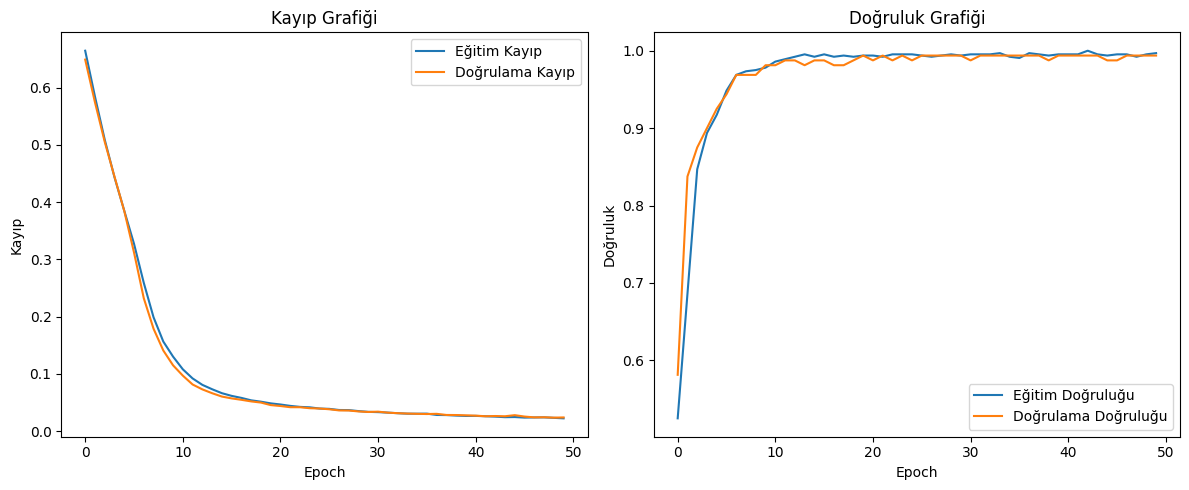

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0256  
Test kaybı: 0.020107604563236237, Test doğruluğu: 0.9950000047683716


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Örnek veri seti oluşturma (2 sınıf)
np.random.seed(42)
X = np.random.rand(1000, 2) * 10  # 0-10 arasında rastgele 2 özellik
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Toplam 10'dan büyükse 1, değilse 0

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeli oluşturma
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(2,)),  # Giriş katmanı
    layers.Dense(8, activation='relu'),                     # Gizli katman
    layers.Dense(1, activation='sigmoid')                   # Çıkış katmanı
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Eğitim kaybı ve doğruluğunu görselleştirme
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()

# Test seti üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test kaybı: {test_loss}, Test doğruluğu: {test_accuracy}")


In [ ]:
import numpy as np

class TwoLayerNeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2):
        # Ağırlıkları ve bias'ları başlat
        self.weights1 = np.random.rand(input_size, hidden_size1)  # İlk gizli katmanın ağırlıkları
        self.bias1 = np.random.rand(hidden_size1)                  # İlk gizli katmanın bias'ı
        self.weights2 = np.random.rand(hidden_size1, hidden_size2) # İkinci gizli katmanın ağırlıkları
        self.bias2 = np.random.rand(hidden_size2)                  # İkinci gizli katmanın bias'ı
        self.weights_output = np.random.rand(hidden_size2, 1)      # Çıkış katmanının ağırlıkları
        self.bias_output = np.random.rand(1)                        # Çıkış katmanının bias'ı

    def activation_function(self, x):
        # Sigmoid aktivasyon fonksiyonu
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        # İlk gizli katmanı hesapla
        z1 = np.dot(inputs, self.weights1) + self.bias1
        a1 = self.activation_function(z1)

        # İkinci gizli katmanı hesapla
        z2 = np.dot(a1, self.weights2) + self.bias2
        a2 = self.activation_function(z2)

        # Çıkış katmanını hesapla
        output = np.dot(a2, self.weights_output) + self.bias_output
        return self.activation_function(output)

    def train(self, inputs, target_output, learning_rate, epochs):
        # Eğitim döngüsü
        for _ in range(epochs):
            # İleri yayılım
            z1 = np.dot(inputs, self.weights1) + self.bias1
            a1 = self.activation_function(z1)
            z2 = np.dot(a1, self.weights2) + self.bias2
            a2 = self.activation_function(z2)
            output = np.dot(a2, self.weights_output) + self.bias_output
            predictions = self.activation_function(output)

            # Geri yayılım
            error = target_output - predictions
            d_output = error * predictions * (1 - predictions)

            error_hidden2 = d_output.dot(self.weights_output.T)
            d_hidden2 = error_hidden2 * a2 * (1 - a2)

            error_hidden1 = d_hidden2.dot(self.weights2.T)
            d_hidden1 = error_hidden1 * a1 * (1 - a1)

            # Ağırlıkları ve bias'ları güncelle
            self.weights_output += a2.T.dot(d_output) * learning_rate
            self.bias_output += np.sum(d_output, axis=0) * learning_rate

            self.weights2 += a1.T.dot(d_hidden2) * learning_rate
            self.bias2 += np.sum(d_hidden2, axis=0) * learning_rate

            self.weights1 += inputs.T.dot(d_hidden1) * learning_rate
            self.bias1 += np.sum(d_hidden1, axis=0) * learning_rate

# Kullanım
if __name__ == "__main__":
    # Örnek veri seti (girişler ve hedef çıkışlar)
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_output = np.array([[0], [1], [1], [0]])  # XOR problemi

    # Modeli oluştur
    nn = TwoLayerNeuralNetwork(input_size=2, hidden_size1=4, hidden_size2=4)

    # Modeli eğit
    nn.train(inputs, target_output, learning_rate=0.1, epochs=10000)

    # Sonuçları kontrol et
    for input_data in inputs:
        print(f"Giriş: {input_data} - Tahmin: {nn.predict(input_data)}")


Giriş: [0 0] - Tahmin: [0.49837585]
Giriş: [0 1] - Tahmin: [0.50036898]
Giriş: [1 0] - Tahmin: [0.50098862]
Giriş: [1 1] - Tahmin: [0.50237343]


<Figure size 1000x600 with 0 Axes>

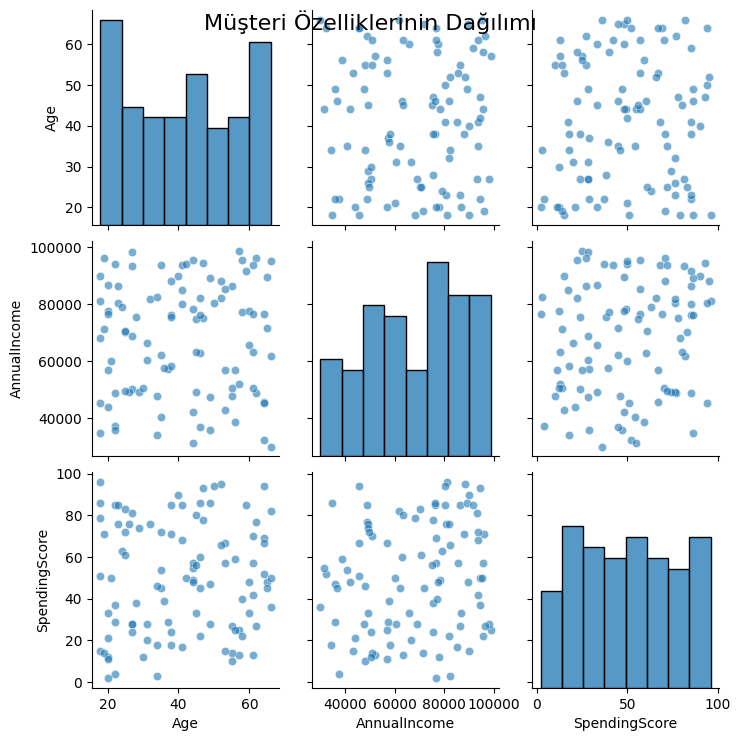

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Seti Oluşturma (Simüle Edilmiş Müşteri Verisi)
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'AnnualIncome': np.random.randint(30_000, 100_000, 100),
    'SpendingScore': np.random.randint(1, 100, 100),
    'Churn': np.random.choice([0, 1], 100)  # 1, müşteri terk etti; 0, terk etmedi
}

# Veri çerçevesi oluşturma
df = pd.DataFrame(data)

# Temel Dağılım Görselleştirmesi
plt.figure(figsize=(10, 6))
sns.pairplot(df[['Age', 'AnnualIncome', 'SpendingScore']], plot_kws={'alpha': 0.6})
plt.suptitle("Müşteri Özelliklerinin Dağılımı", size=16)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Müşteri verisi oluşturma (Simüle edilmiş)
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 60, 100),  # Yaş
    'AnnualIncome': np.random.randint(30_000, 100_000, 100),  # Yıllık Gelir
    'PurchaseFrequency': np.random.randint(1, 20, 100),  # Yıllık Alışveriş Sıklığı
    'ProductPreference': np.random.choice(['Shampoo', 'Conditioner', 'HairMask'], 100)  # Ürün Tercihi
}

# Veri çerçevesi oluşturma
df = pd.DataFrame(data)

# Veri çerçevesinin ilk 5 satırını inceleyelim
print(df.head())


   CustomerID  Age  AnnualIncome  PurchaseFrequency ProductPreference
0           1   56         70340                 15           Shampoo
1           2   27         31887                  1           Shampoo
2           3   58         32676                 10          HairMask
3           4   18         82550                  6       Conditioner
4           5   22         78349                 12          HairMask


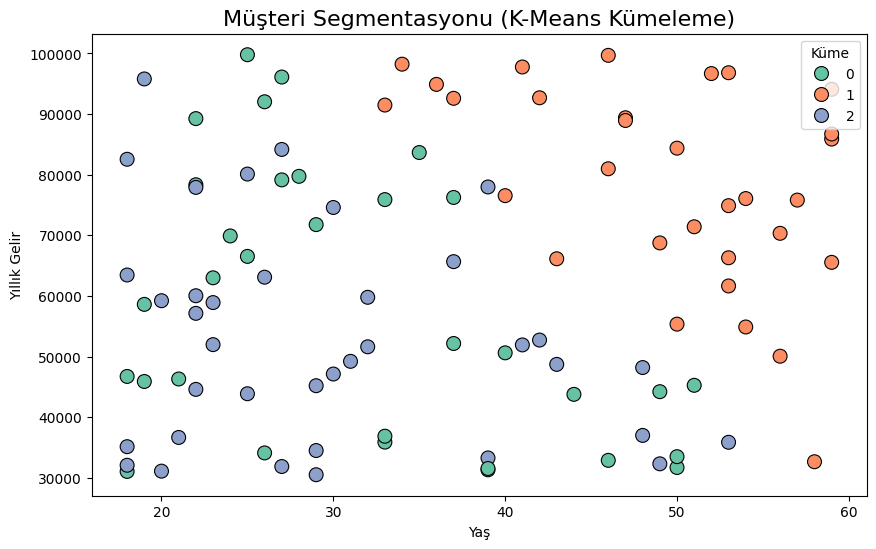

In [ ]:
# Veriyi ölçeklendirme (Kümeleme için)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'PurchaseFrequency']])

# KMeans Kümeleme (3 Küme)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Kümeleme Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['AnnualIncome'], hue=df['Cluster'], palette='Set2', s=100, edgecolor='black')
plt.title("Müşteri Segmentasyonu (K-Means Kümeleme)", size=16)
plt.xlabel('Yaş')
plt.ylabel('Yıllık Gelir')
plt.legend(title='Küme')
plt.show()


<ipython-input-7-58ba87b3ef28>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


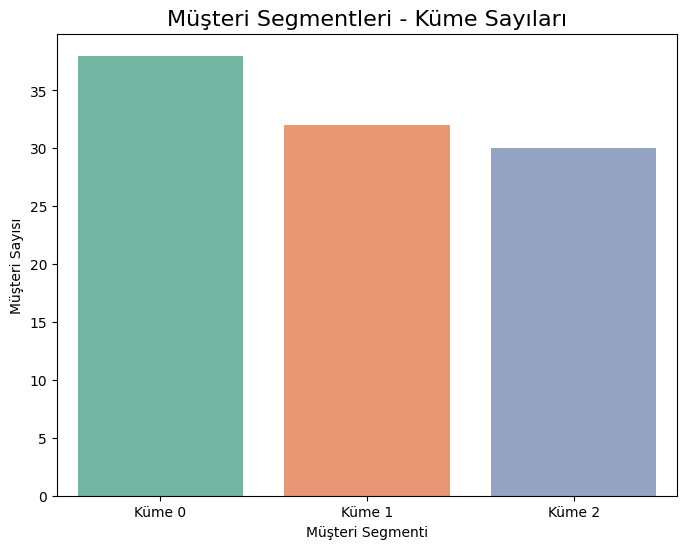

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Simüle edilmiş müşteri verisi
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 60, 100),  # Yaş
    'AnnualIncome': np.random.randint(30_000, 100_000, 100),  # Yıllık Gelir
    'PurchaseFrequency': np.random.randint(1, 20, 100),  # Yıllık Alışveriş Sıklığı
}

df = pd.DataFrame(data)

# Veriyi ölçeklendirme (Kümeleme için)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'PurchaseFrequency']])

# KMeans Kümeleme (3 Küme)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Müşteri segmentlerine göre müşteri sayısını bar grafiği ile gösterelim
cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title('Müşteri Segmentleri - Küme Sayıları', size=16)
plt.xlabel('Müşteri Segmenti')
plt.ylabel('Müşteri Sayısı')
plt.xticks(ticks=cluster_counts.index, labels=[f'Küme {i}' for i in cluster_counts.index])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Simüle edilmiş müşteri verisi
np.random.seed(42)
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 60, 100),  # Yaş
    'AnnualIncome': np.random.randint(20_000, 120_000, 100),  # Yıllık Gelir
    'Gender': np.random.choice(['Male', 'Female'], 100),  # Cinsiyet
    'PurchaseFrequency': np.random.randint(1, 4, 100),  # Yıllık Alışveriş Sıklığı
}

# Veri çerçevesi oluşturma
df = pd.DataFrame(data)

# Yaş grupları ve gelir gruplarını oluşturma
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 24, 40, 60], labels=['18-24', '25-40', '41-60'])
df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=[0, 30_000, 60_000, 100_000, 150_000],
                           labels=['Low', 'Medium', 'High', 'Very High'])

# Veri çerçevesinin ilk 5 satırını görelim
df.head()


,CustomerID,Age,AnnualIncome,Gender,PurchaseFrequency,AgeGroup,IncomeGroup
0,1,56,28392,Male,1,41-60,Low
1,2,46,50535,Female,3,41-60,Medium
2,3,32,98603,Male,1,25-40,High
3,4,25,72256,Male,2,25-40,High
4,5,38,109135,Male,2,25-40,Very High


<ipython-input-5-ac213783779c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=df, palette='Set1')


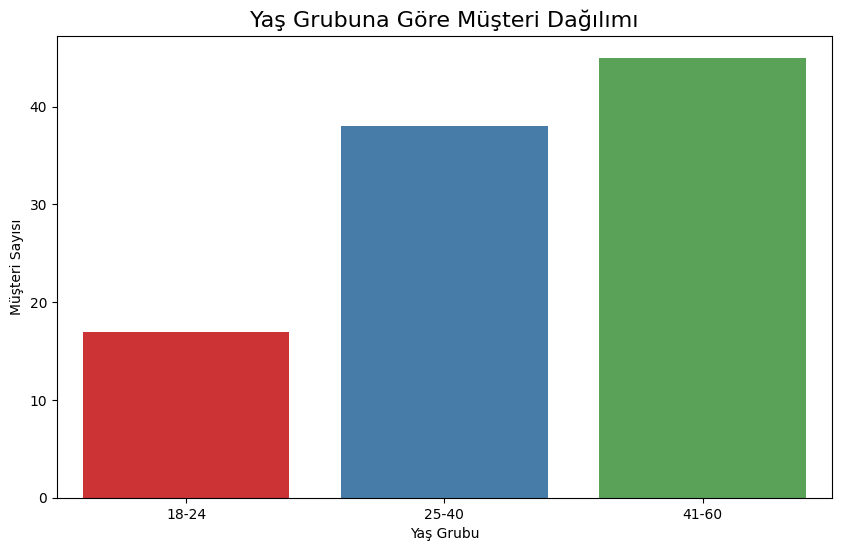

<ipython-input-5-ac213783779c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncomeGroup', data=df, palette='Set2')


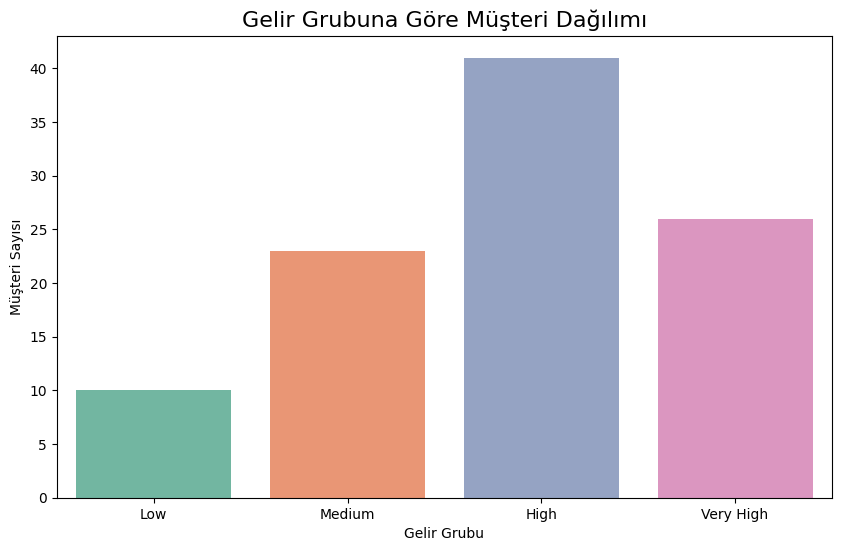

<ipython-input-5-ac213783779c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set3')


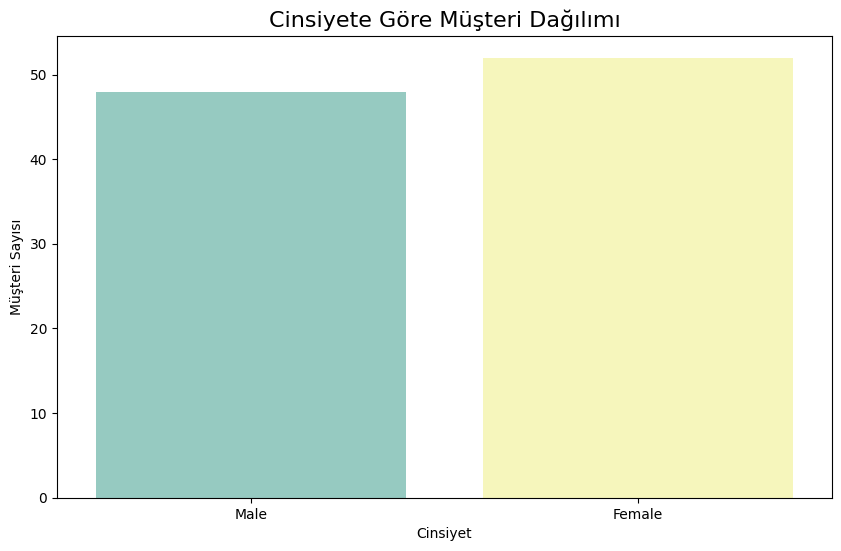

In [ ]:
# Yaş grubu dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=df, palette='Set1')
plt.title('Yaş Grubuna Göre Müşteri Dağılımı', size=16)
plt.xlabel('Yaş Grubu')
plt.ylabel('Müşteri Sayısı')
plt.show()

# Gelir grubu dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='IncomeGroup', data=df, palette='Set2')
plt.title('Gelir Grubuna Göre Müşteri Dağılımı', size=16)
plt.xlabel('Gelir Grubu')
plt.ylabel('Müşteri Sayısı')
plt.show()

# Cinsiyet dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='Set3')
plt.title('Cinsiyete Göre Müşteri Dağılımı', size=16)
plt.xlabel('Cinsiyet')
plt.ylabel('Müşteri Sayısı')
plt.show()


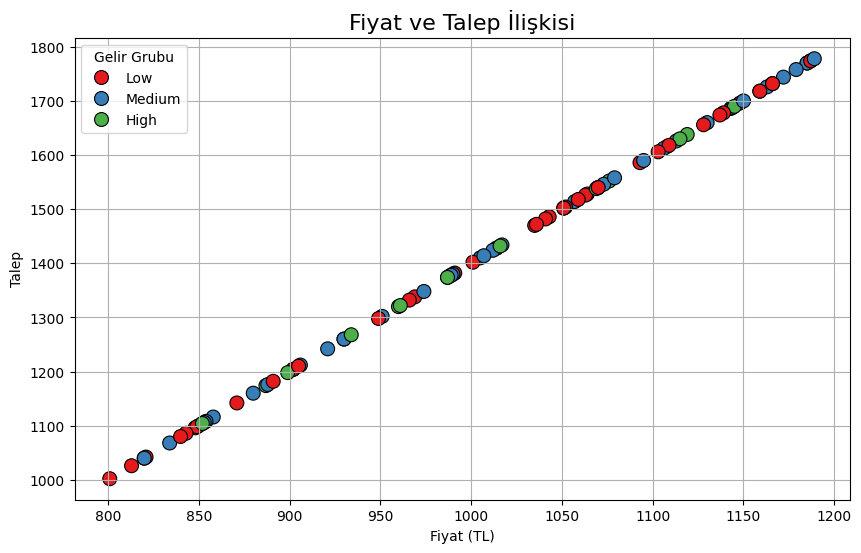

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini oluşturma
np.random.seed(42)  # Tekrarlanabilir sonuçlar için

# Fiyat verilerini oluşturma (800 ile 1200 TL arasında)
df = pd.DataFrame({
    'Price': np.random.randint(800, 1200, 100)  # Ürün fiyatları
})

# Gelir grubunu oluşturma (Gelir grubu 3 farklı segment: Düşük, Orta, Yüksek)
df['IncomeGroup'] = np.random.choice(['Low', 'Medium', 'High'], size=100, p=[0.4, 0.4, 0.2])

# Talep verisini oluşturma (Fiyatla orantılı olarak talep hesaplama)
df['Demand'] = 1000 + (df['Price'] - 800) * 2  # Talep - Fiyat elastikiyeti

# Fiyat ve talep arasındaki ilişkiyi görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Price'], y=df['Demand'], hue=df['IncomeGroup'], palette='Set1', s=100, edgecolor='black')
plt.title('Fiyat ve Talep İlişkisi', size=16)
plt.xlabel('Fiyat (TL)')
plt.ylabel('Talep')
plt.legend(title='Gelir Grubu')
plt.grid(True)
plt.show()



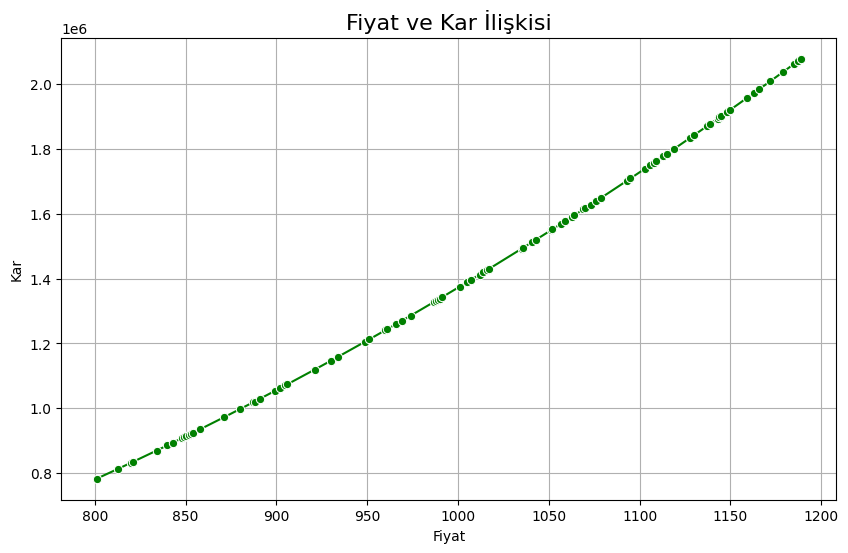

Optimum Fiyat: 1189


In [ ]:
# Maliyet sabitini belirleyelim
cost = 20  # Sabit maliyet

# Kar hesaplama
df['Profit'] = (df['Price'] - cost) * df['Demand']

# Karın fiyat ile nasıl değiştiğini görselleştirelim
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Price'], y=df['Profit'], color='green', marker='o')
plt.title('Fiyat ve Kar İlişkisi', size=16)
plt.xlabel('Fiyat')
plt.ylabel('Kar')
plt.grid(True)
plt.show()

# Karın en yüksek olduğu fiyatı bulalım
optimal_price = df.loc[df['Profit'].idxmax(), 'Price']
print(f"Optimum Fiyat: {optimal_price}")


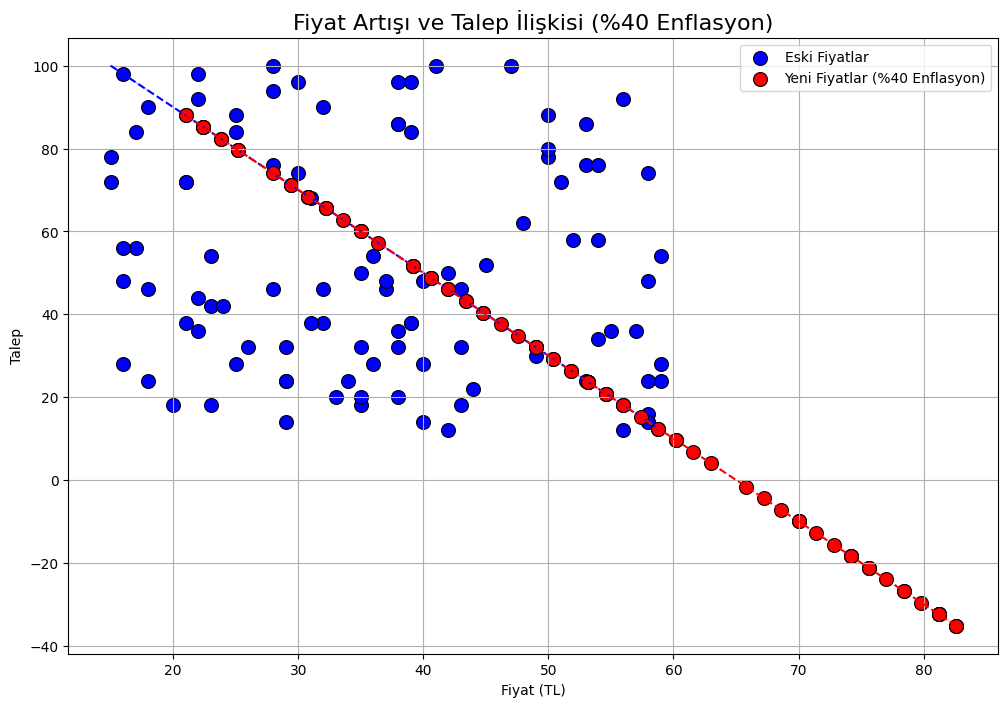

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Seyyide markası için fiyat ve talep verisi simüle edelim
np.random.seed(42)
df = pd.DataFrame({
    'Price': np.random.randint(15, 60, 100),  # Başlangıç fiyatları
    'Demand': 100 - (np.random.randint(15, 60, 100) - 15) * 2,  # Talep - Fiyat elastikiyeti
})

# Enflasyon oranı %40'ı fiyatlara uygulayalım
inflation_rate = 0.40
df['NewPrice'] = df['Price'] * (1 + inflation_rate)  # Yeni fiyatlar

# Talep, yeni fiyatlarla değişecek şekilde simüle edelim
df['NewDemand'] = 100 - (df['NewPrice'] - 15) * 2  # Yeni talep - Fiyat elastikiyeti

# Fiyat ve talep ilişkisini çizelim
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Price'], y=df['Demand'], label='Eski Fiyatlar', color='blue', s=100, edgecolor='black')
sns.scatterplot(x=df['NewPrice'], y=df['NewDemand'], label='Yeni Fiyatlar (%40 Enflasyon)', color='red', s=100, edgecolor='black')

# Regresyon hatları
sns.lineplot(x=df['Price'], y=100 - (df['Price'] - 15) * 2, color='blue', linestyle='--')
sns.lineplot(x=df['NewPrice'], y=100 - (df['NewPrice'] - 15) * 2, color='red', linestyle='--')

plt.title('Fiyat Artışı ve Talep İlişkisi (%40 Enflasyon)', size=16)
plt.xlabel('Fiyat (TL)')
plt.ylabel('Talep')
plt.legend()
plt.grid(True)
plt.show()


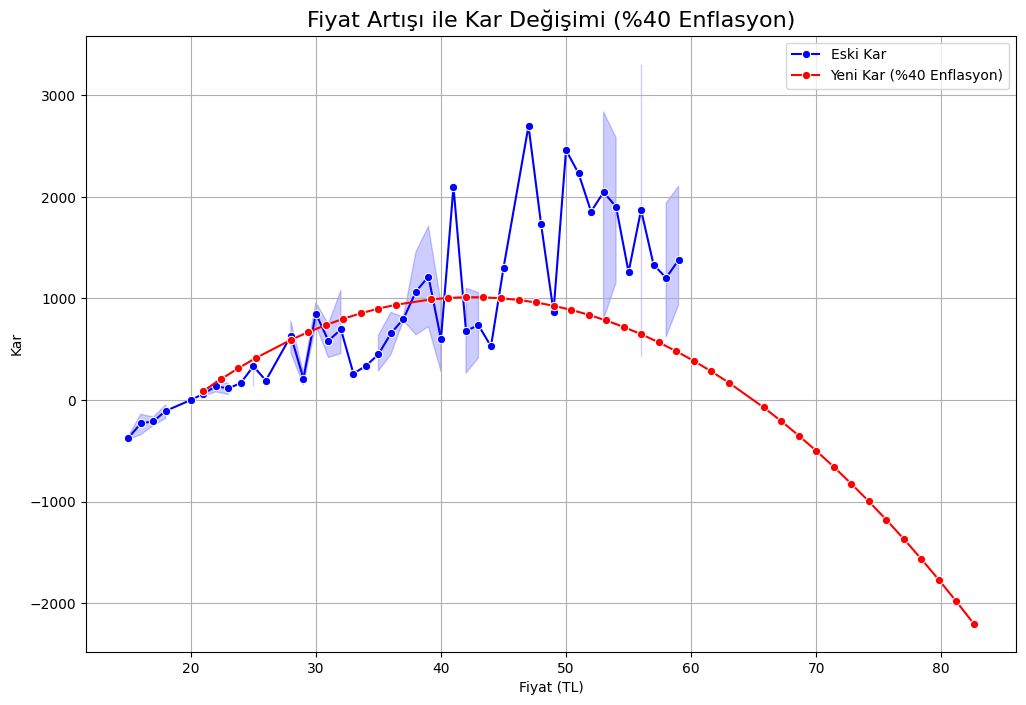

Eski Fiyat ile Optimum Kar: 56 TL
Yeni Fiyat ile Optimum Kar: 42.0 TL


In [ ]:
# Sabit maliyet
cost = 20  # Sabit maliyet

# Kar hesaplaması (eski ve yeni fiyatlarla)
df['OldProfit'] = (df['Price'] - cost) * df['Demand']
df['NewProfit'] = (df['NewPrice'] - cost) * df['NewDemand']

# Kar değişimini görselleştirelim
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['Price'], y=df['OldProfit'], label='Eski Kar', color='blue', linestyle='-', marker='o')
sns.lineplot(x=df['NewPrice'], y=df['NewProfit'], label='Yeni Kar (%40 Enflasyon)', color='red', linestyle='-', marker='o')

plt.title('Fiyat Artışı ile Kar Değişimi (%40 Enflasyon)', size=16)
plt.xlabel('Fiyat (TL)')
plt.ylabel('Kar')
plt.legend()
plt.grid(True)
plt.show()

# En yüksek karı sağlayan fiyatı bulalım
optimal_price_old = df.loc[df['OldProfit'].idxmax(), 'Price']
optimal_price_new = df.loc[df['NewProfit'].idxmax(), 'NewPrice']

print(f"Eski Fiyat ile Optimum Kar: {optimal_price_old} TL")
print(f"Yeni Fiyat ile Optimum Kar: {optimal_price_new} TL")


In [ ]:
# Optimum fiyatları yazdıralım
optimal_price_old = df.loc[df['OldProfit'].idxmax(), 'Price']
optimal_price_new = df.loc[df['NewProfit'].idxmax(), 'NewPrice']

optimal_price_old, optimal_price_new


(56, 42.0)

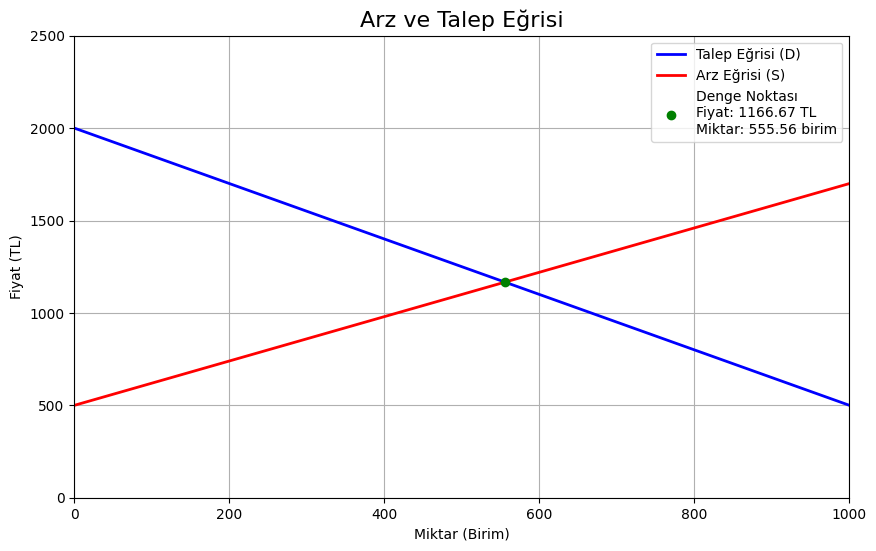

Denge Miktarı: 555.56 birim
Denge Fiyatı: 1166.67 TL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Miktar aralığını belirleme (X ekseni)
quantity_range = np.linspace(0, 1000, 100)  # Miktar aralığı (0 ile 1000 arasında)

# Talep fonksiyonu (fiyat arttıkça talep azalır)
a = -1.5  # Talep eğrisinin eğimi (negatif)
b = 2000  # Sabit terim (başlangıç fiyatı)
price_demand = a * quantity_range + b

# Arz fonksiyonu (fiyat arttıkça arz artar)
c = 1.2  # Arz eğrisinin eğimi (pozitif)
d = 500   # Sabit terim (başlangıç fiyatı)
price_supply = c * quantity_range + d

# Grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(quantity_range, price_demand, label="Talep Eğrisi (D)", color='blue', linewidth=2)
plt.plot(quantity_range, price_supply, label="Arz Eğrisi (S)", color='red', linewidth=2)

# Denge noktasını hesaplama (talep = arz)
# Talep ve arz eşitlendiği noktayı bulmamız gerek.
def equilibrium(x):
    return (a * x + b) - (c * x + d)

# fsolve ile denge miktarını bulalım
equilibrium_quantity = fsolve(equilibrium, 300)[0]  # Başlangıç tahmini 300 birim
equilibrium_price = a * equilibrium_quantity + b  # Denge fiyatı, talep fonksiyonu üzerinden

# Denge noktasını işaretleyelim
plt.scatter(equilibrium_quantity, equilibrium_price, color='green', label=f"Denge Noktası\nFiyat: {equilibrium_price:.2f} TL\nMiktar: {equilibrium_quantity:.2f} birim", zorder=5)

# Grafik detayları
plt.title("Arz ve Talep Eğrisi", size=16)
plt.xlabel("Miktar (Birim)")
plt.ylabel("Fiyat (TL)")
plt.legend(loc="best")
plt.grid(True)
plt.xlim(0, 1000)
plt.ylim(0, 2500)
plt.show()

# Denge noktası sonucu
print(f"Denge Miktarı: {equilibrium_quantity:.2f} birim")
print(f"Denge Fiyatı: {equilibrium_price:.2f} TL")


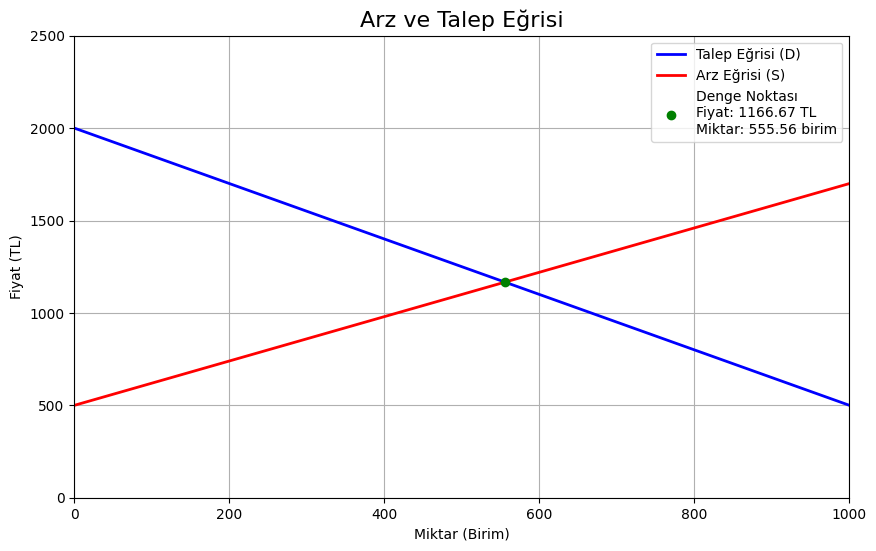

Denge Miktarı: 555.56 birim
Denge Fiyatı: 1166.67 TL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Miktar aralığını belirleme (X ekseni)
quantity_range = np.linspace(0, 1000, 100)  # Miktar aralığı (0 ile 1000 arasında)

# Talep fonksiyonu (fiyat arttıkça talep azalır)
a = -1.5  # Talep eğrisinin eğimi (negatif)
b = 2000  # Sabit terim (başlangıç fiyatı)
price_demand = a * quantity_range + b

# Arz fonksiyonu (fiyat arttıkça arz artar)
c = 1.2  # Arz eğrisinin eğimi (pozitif)
d = 500   # Sabit terim (başlangıç fiyatı)
price_supply = c * quantity_range + d

# Grafiği oluşturma
plt.figure(figsize=(10, 6))
plt.plot(quantity_range, price_demand, label="Talep Eğrisi (D)", color='blue', linewidth=2)
plt.plot(quantity_range, price_supply, label="Arz Eğrisi (S)", color='red', linewidth=2)

# Denge noktasını hesaplama (talep = arz)
# Talep ve arz eşitlendiği noktayı bulmamız gerek.
def equilibrium(x):
    return (a * x + b) - (c * x + d)

# fsolve ile denge miktarını bulalım
equilibrium_quantity = fsolve(equilibrium, 300)[0]  # Başlangıç tahmini 300 birim
equilibrium_price = a * equilibrium_quantity + b  # Denge fiyatı, talep fonksiyonu üzerinden

# Denge noktasını işaretleyelim
plt.scatter(equilibrium_quantity, equilibrium_price, color='green', label=f"Denge Noktası\nFiyat: {equilibrium_price:.2f} TL\nMiktar: {equilibrium_quantity:.2f} birim", zorder=5)

# Grafik detayları
plt.title("Arz ve Talep Eğrisi", size=16)
plt.xlabel("Miktar (Birim)")
plt.ylabel("Fiyat (TL)")
plt.legend(loc="best")
plt.grid(True)
plt.xlim(0, 1000)
plt.ylim(0, 2500)
plt.show()

# Denge noktası sonucu
print(f"Denge Miktarı: {equilibrium_quantity:.2f} birim")
print(f"Denge Fiyatı: {equilibrium_price:.2f} TL")


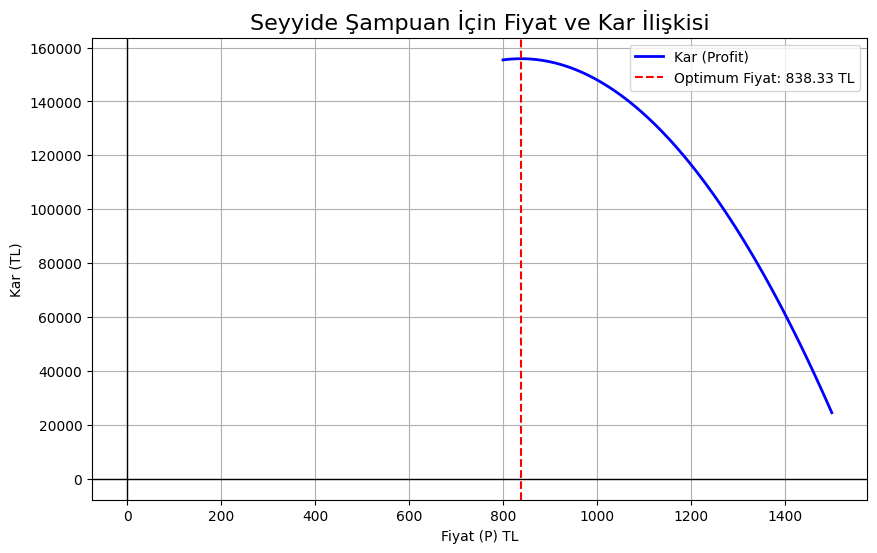

Optimum Fiyat: 838.33 TL
Optimum Miktar: 248.50 birim
Optimum Kar: 155840.83 TL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sabit maliyet (Fixed Cost)
FC = 50000  # Sabit maliyet (50.000 TL)

# Değişken maliyet fonksiyonu: Q başına maliyet
def variable_cost(Q):
    return 10 * Q  # 10 TL değişken maliyet (her şişe için)

# Toplam gelir fonksiyonu: P * Q
def total_revenue(P, Q):
    return P * Q

# Toplam maliyet fonksiyonu: Sabit maliyet + Değişken maliyet
def total_cost(Q):
    return FC + variable_cost(Q)

# Kar fonksiyonu: Toplam gelir - Toplam maliyet
def profit(P):
    # Talep fonksiyonu Q = 500 - 0.3 * P
    Q = 500 - 0.3 * P
    TR = total_revenue(P, Q)
    TC = total_cost(Q)
    return -(TR - TC)  # Karı maksimize etmek için negatifini alıyoruz

# Fiyat aralığı (P) 800 TL ile 1500 TL arasında değişiyor
P_values = np.linspace(800, 1500, 100)

# Kar hesaplamak
profit_values = [profit(p) for p in P_values]

# Optimum fiyatı bulma
result = minimize(profit, x0=1000, bounds=[(800, 1500)])
optimal_price = result.x[0]

# Optimum miktarı ve karı hesaplama
optimal_quantity = 500 - 0.3 * optimal_price  # Talep fonksiyonu
optimal_profit = -result.fun  # Karın maksimum olduğu değeri alıyoruz

# Grafiği çizme
plt.figure(figsize=(10, 6))
plt.plot(P_values, -np.array(profit_values), label='Kar (Profit)', color='blue', linewidth=2)
plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'Optimum Fiyat: {optimal_price:.2f} TL')

# Grafik detayları
plt.title('Seyyide Şampuan İçin Fiyat ve Kar İlişkisi', size=16)
plt.xlabel('Fiyat (P) TL')
plt.ylabel('Kar (TL)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.legend(loc="best")
plt.show()

# Sonuçları yazdırma
print(f"Optimum Fiyat: {optimal_price:.2f} TL")
print(f"Optimum Miktar: {optimal_quantity:.2f} birim")
print(f"Optimum Kar: {optimal_profit:.2f} TL")


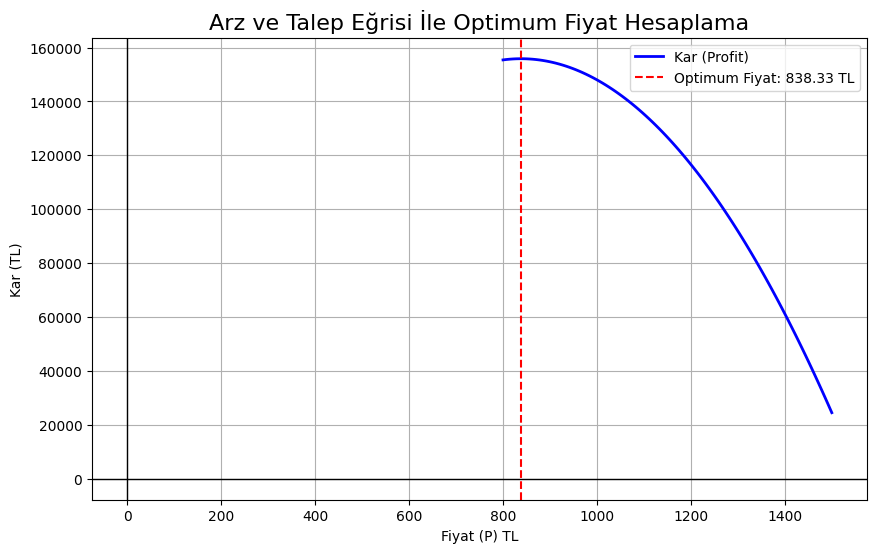

Optimum Fiyat: 838.33 TL
Optimum Miktar: 248.50 birim
Optimum Kar: 155840.83 TL


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Sabit maliyet ve değişken maliyetler
FC = 50000  # Sabit maliyet (50.000 TL)
VC = 10     # Değişken maliyet (10 TL / ürün)

# Talep fonksiyonu: Q = 500 - 0.3 * P
def demand(P):
    return 500 - 0.3 * P

# Toplam gelir fonksiyonu: TR = P * Q
def total_revenue(P):
    Q = demand(P)
    return P * Q

# Toplam maliyet fonksiyonu: TC = FC + VC * Q
def total_cost(P):
    Q = demand(P)
    return FC + VC * Q

# Kâr fonksiyonu: Profit = TR - TC
def profit(P):
    TR = total_revenue(P)
    TC = total_cost(P)
    return -(TR - TC)  # Karı maksimize etmek için negatifini alıyoruz

# Fiyat aralığı (P) 800 TL ile 1500 TL arasında değişiyor
P_values = np.linspace(800, 1500, 100)

# Kar hesaplamak
profit_values = [profit(p) for p in P_values]

# Optimum fiyatı bulma
result = minimize(profit, x0=1000, bounds=[(800, 1500)])
optimal_price = result.x[0]

# Optimum miktarı ve karı hesaplama
optimal_quantity = demand(optimal_price)
optimal_profit = -result.fun  # Karın maksimum olduğu değeri alıyoruz

# Grafiği çizme
plt.figure(figsize=(10, 6))
plt.plot(P_values, -np.array(profit_values), label='Kar (Profit)', color='blue', linewidth=2)
plt.axvline(x=optimal_price, color='red', linestyle='--', label=f'Optimum Fiyat: {optimal_price:.2f} TL')

# Grafik detayları
plt.title('Arz ve Talep Eğrisi İle Optimum Fiyat Hesaplama', size=16)
plt.xlabel('Fiyat (P) TL')
plt.ylabel('Kar (TL)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.legend(loc="best")
plt.show()

# Sonuçları yazdırma
print(f"Optimum Fiyat: {optimal_price:.2f} TL")
print(f"Optimum Miktar: {optimal_quantity:.2f} birim")
print(f"Optimum Kar: {optimal_profit:.2f} TL")
